In [16]:
# Importo librerie
import numpy as np
import math as mt
from scipy.stats import norm
from scipy import integrate
import matplotlib.pyplot as plt

In [17]:
## punto A

# Parametri
lgd = 0.60
X0 = 100
Str = 95
sigma = 20
T = 2
t = 0
# Parametri dei CDS
r = 0.03
lambda1 = 0.04935

In [18]:
# Funzione per calcolare il prezzo del derivato con dinamica Bachelier
def prezzo_bc(X0, Str, sigma, t):
    b1 = (X0 - Str)/(sigma*mt.sqrt(t))
    return (X0 - Str)*norm.cdf(b1) + sigma*mt.sqrt(t)*norm.pdf(b1)

In [19]:
# Calcolo valore CVA
integranda = lambda s: mt.exp(-r*s)*prezzo_bc(X0, Str, sigma, s) * lambda1*mt.exp(-lambda1*s)
CVA = - lgd*integrate.quad(integranda, t, T)[0]
print ("Prezzo CVA:", CVA)

Prezzo CVA: -0.5606212289231395


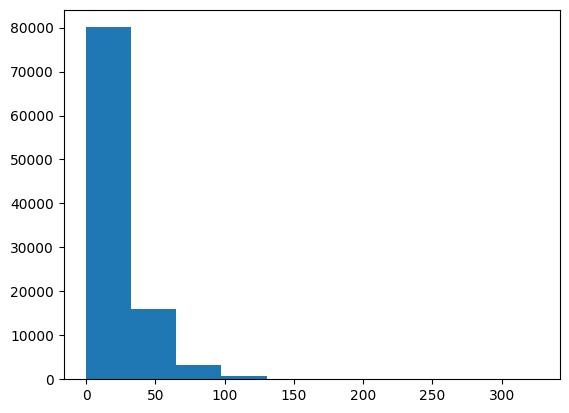

In [20]:
# Punto B
N = 100000       

# Simulazione dei tempi di fallimento
U = np.random.uniform(0,1,N)
tau = -1/lambda1 * np.log(1-U)

# Plot dei tau simulati
plt.hist(tau)
plt.show()

In [21]:
# Calcolo dei CVA simulati sui tau filtrati
CVAsim = []

for default in tau:
    if default >= T:
        CVAsim.append(0)
    else:
        CVAsim.append(-lgd* np.exp(-r*default)*prezzo_bc(X0, Str, sigma, default))

Il valore del CVA è: -0.5606212289231395
Intervallo di confidenza al 98% per il CVA: (-0.5755, -0.5491)


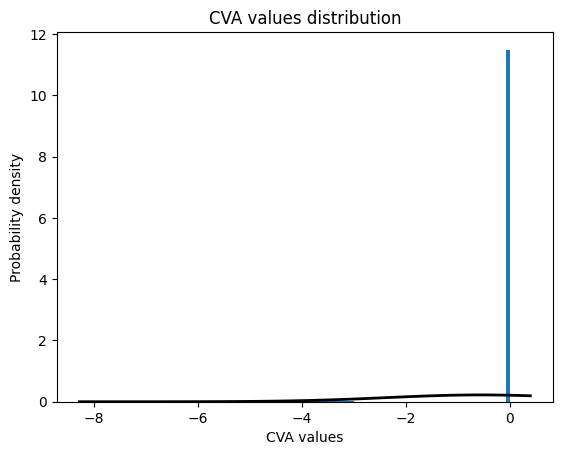

In [22]:
# Calcolo intervallo di confidenza

# Media e deviazione standard storica
mean_CVAsim = np.mean(CVAsim)
std_CVAsim = np.std(CVAsim)

# Stima dell'intervallo di confidenza al 98% per il CVA (alpha = 0.01)
alpha = 0.01
z = norm.ppf(alpha)
low = mean_CVAsim - z * std_CVAsim / np.sqrt(N)
up = mean_CVAsim + z * std_CVAsim / np.sqrt(N)

print("Il valore del CVA è:", CVA )
print("Intervallo di confidenza al 98% per il CVA: ({:.4f}, {:.4f})".format(up, low))

# Istogramma dei valori raggruppati in 100 gruppi
plt.hist(CVAsim, bins=100, density=True)

# Calcolo della funzione di densità di una normale standard
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_CVAsim, std_CVAsim)

# Plot
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('CVA values')
plt.ylabel('Probability density')
plt.title('CVA values distribution')
plt.show()